In [1]:
import json
import os
import shutil
import time
from base64 import b64decode
from io import BytesIO
from IPython import get_ipython
from IPython.core.magic import register_cell_magic

from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import PIL
import seaborn as sns
#%config InlineBackend.figure_format = 'svg'  

@register_cell_magic
def capture_png(line, cell):
    get_ipython().run_cell_magic(
        'capture',
        ' --no-stderr --no-stdout result',
        cell
    )
    code =cell

    out_paths = line.strip().split(' ')
    for output in result.outputs:
        display(output)
        data = output.data
        if 'image/png' in data:
            path = out_paths.pop(0)
            path = path.split(".png")[0] + str(time.time_ns()) + ".png"
            if not path:
                raise ValueError('Too few paths given!')
            png_bytes = data['image/png']
            if isinstance(png_bytes, str):
                png_bytes = b64decode(png_bytes)
            assert isinstance(png_bytes, bytes)
            bytes_io = BytesIO(png_bytes)
            image = PIL.Image.open(bytes_io)
            image.save(path, 'png')
            

        joson_file_path = "imgs/array_gallery.json"

        with open(joson_file_path, "r") as jsonFile:
            data = json.load(jsonFile)

        data[path[5:]] = code

        with open(joson_file_path, "w") as jsonFile:
            json.dump(data, jsonFile, indent=2)


def disp(x, sep='.0f', annot=False,  figsize=(5,5)): 
    plt.figure(figsize =figsize)
    plt.axis("off")
    sns.heatmap(x,annot=annot,fmt=sep, cmap="YlGnBu", cbar=False); # Change range with: vmin=0, vmax=1
        
temp_path = Path.cwd() / "temp_images"
temp_path.mkdir(parents=False, exist_ok=True)

# 2D Arrays

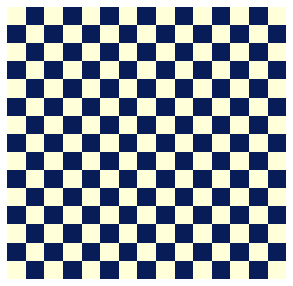

In [2]:
%%capture_png imgs/example.png
#Checkboard
pixX= 15
pixY= 15
array = [[(i+j)%2 for i in range(pixX)] for j in range(pixY)]
disp(array)

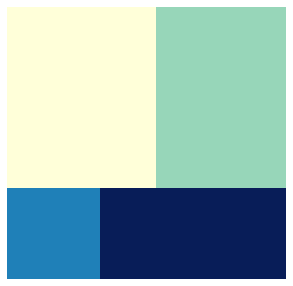

In [3]:
%%capture_png imgs/example.png
#from 4 regions
region0 = np.zeros( (10,8) )
region1 = np.ones( (10,7) )
region_top= np.concatenate( [region0,region1] , axis=1)

region2 = np.full( (5,5) , 2)
region3 = np.full( (5,10) ,3)
region_bottom = np.concatenate( [region2,region3] , axis=1)

array= np.concatenate( [region_top,region_bottom] ,axis=0)
disp(array)